In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, silhouette_score

In [2]:
df = pd.read_csv("kazalar.csv")
df

,Havayolu Şirketi,Uçak Tipi,ülke sınırları,Yıl,Hava Durumu,Ölü Sayısı,Kurtulan Sayısı
0,Germanwings,Airbus A320-211,0,1950,NaN,150.0,0.0
1,Blue Wing,Antonov An-28,0,1953,NaN,19.0,0.0
2,Blue Wing,Antonov An-28,0,1953,NaN,0.0,8.0
3,Blue Wing,Antonov An-28,0,1954,NaN,8.0,0.0
4,Paninternational,BAC One-Eleven,1,1954,NaN,22.0,99.0
...,...,...,...,...,...,...,...
136,Yemenia,Airbus A310-324,0,2020,NaN,152.0,1.0
137,Olympic Airlines,Boeing 747-284B,1,2020,NaN,0.0,418.0
138,Eastern Airlines,Lockheed L-1011-385-1 Üç Yıldızlı,0,2020,NaN,101.0,75.0
139,Eastern Airlines,Douglas DC-9-31,0,2020,NaN,72.0,10.0


In [3]:
df = df.fillna(df.mode().iloc[0])

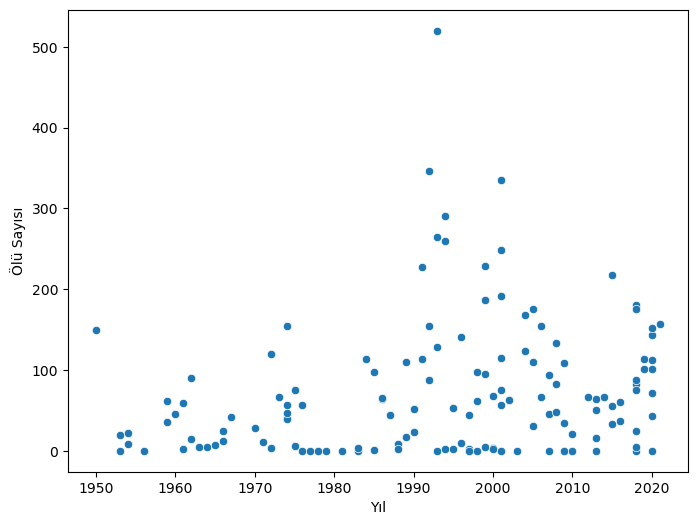

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Yıl'], y=df['Ölü Sayısı'])
plt.xlabel('Yıl')
plt.ylabel('Ölü Sayısı')
plt.show()

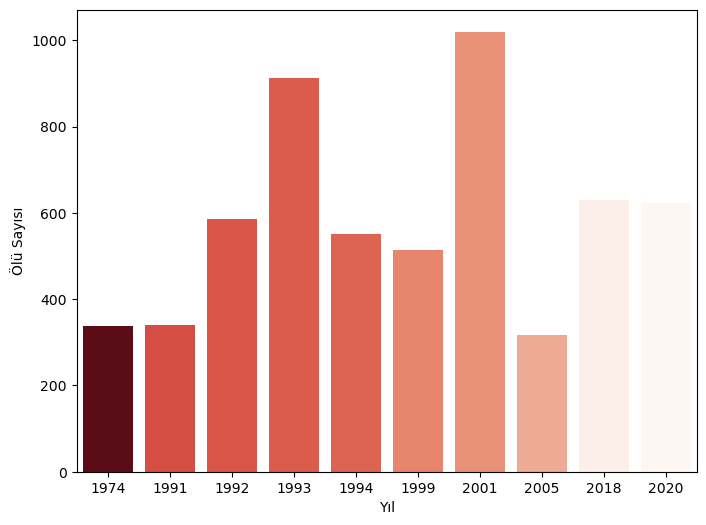

In [5]:
top_years = df.groupby("Yıl")["Ölü Sayısı"].sum().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_years.index, y=top_years.values, hue=top_years.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel('Yıl')
plt.ylabel('Ölü Sayısı')
plt.show()

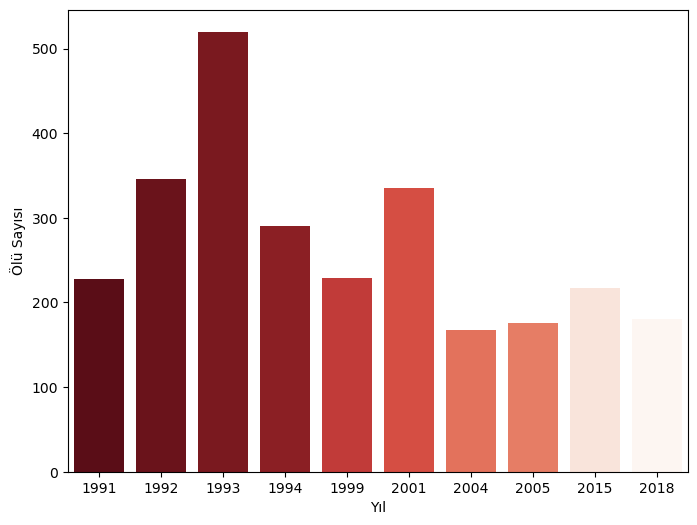

In [6]:
top_years_deaths = df.groupby("Yıl")["Ölü Sayısı"].max().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_years_deaths.index, y=top_years_deaths.values, hue=top_years_deaths.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel('Yıl')
plt.ylabel('Ölü Sayısı')
plt.show()

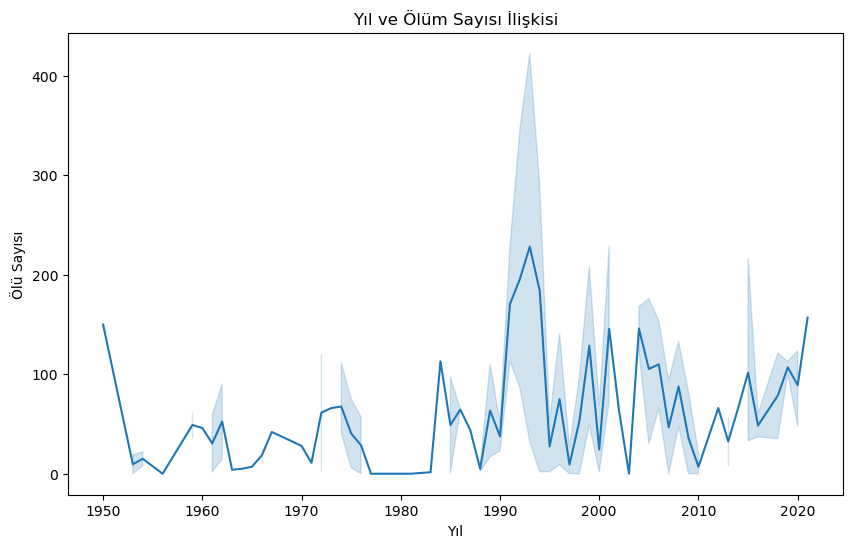

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Yıl', y='Ölü Sayısı', data=df)
plt.xlabel('Yıl')
plt.ylabel('Ölü Sayısı')
plt.title('Yıl ve Ölüm Sayısı İlişkisi')
plt.show()

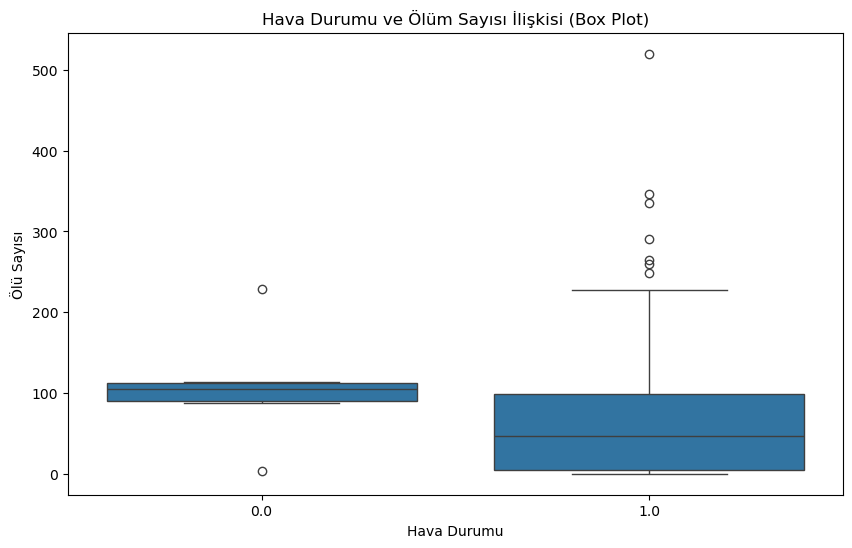

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hava Durumu', y='Ölü Sayısı', data=df)
plt.xlabel('Hava Durumu')
plt.ylabel('Ölü Sayısı')
plt.title('Hava Durumu ve Ölüm Sayısı İlişkisi (Box Plot)')
plt.show()

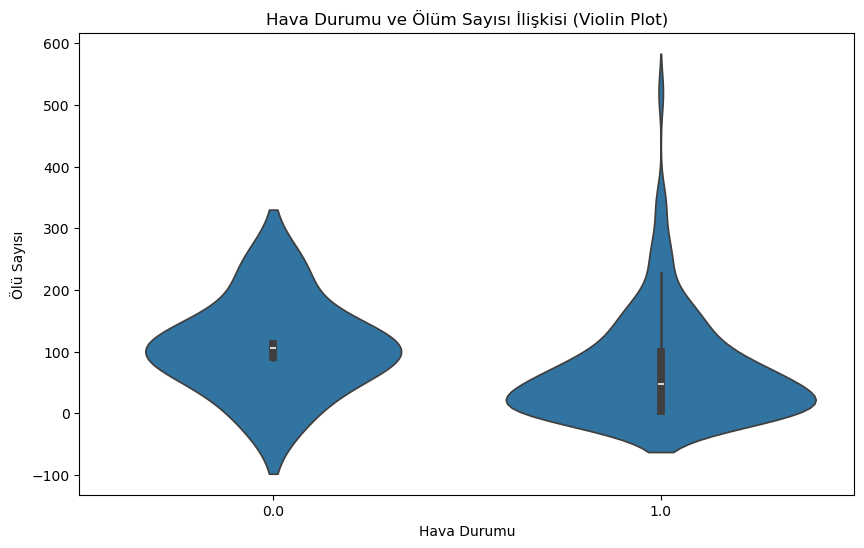

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Hava Durumu', y='Ölü Sayısı', data=df)
plt.xlabel('Hava Durumu')
plt.ylabel('Ölü Sayısı')
plt.title('Hava Durumu ve Ölüm Sayısı İlişkisi (Violin Plot)')
plt.show()

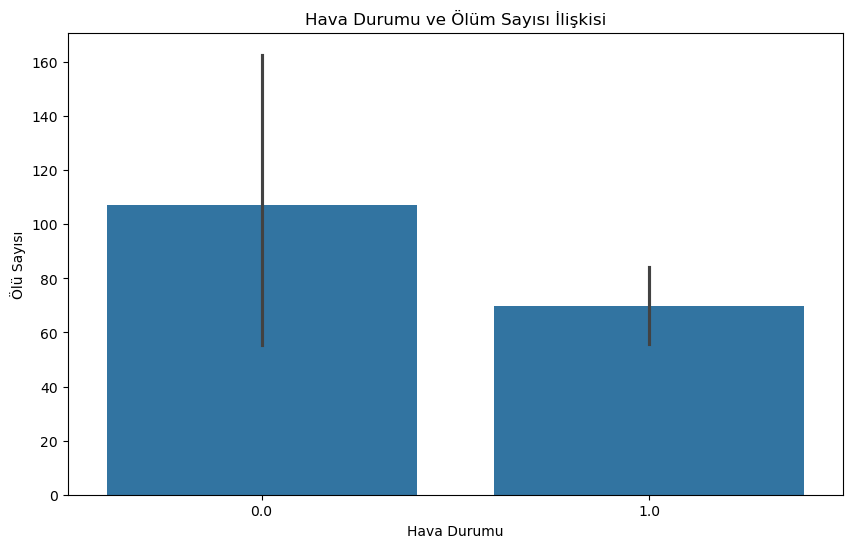

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hava Durumu', y='Ölü Sayısı', data=df)
plt.xlabel('Hava Durumu')
plt.ylabel('Ölü Sayısı')
plt.title('Hava Durumu ve Ölüm Sayısı İlişkisi')
plt.show()

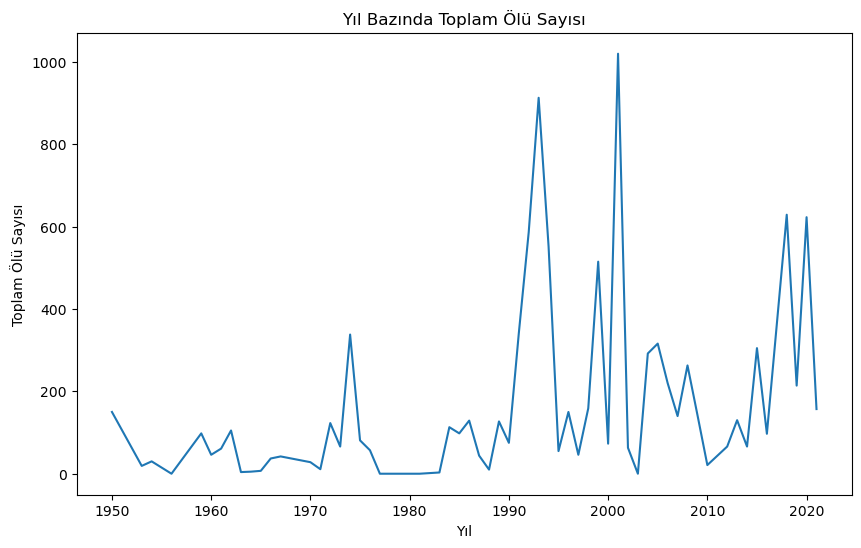

In [11]:
yearly_deaths = df.groupby('Yıl')['Ölü Sayısı'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values)
plt.xlabel('Yıl')
plt.ylabel('Toplam Ölü Sayısı')
plt.title('Yıl Bazında Toplam Ölü Sayısı')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

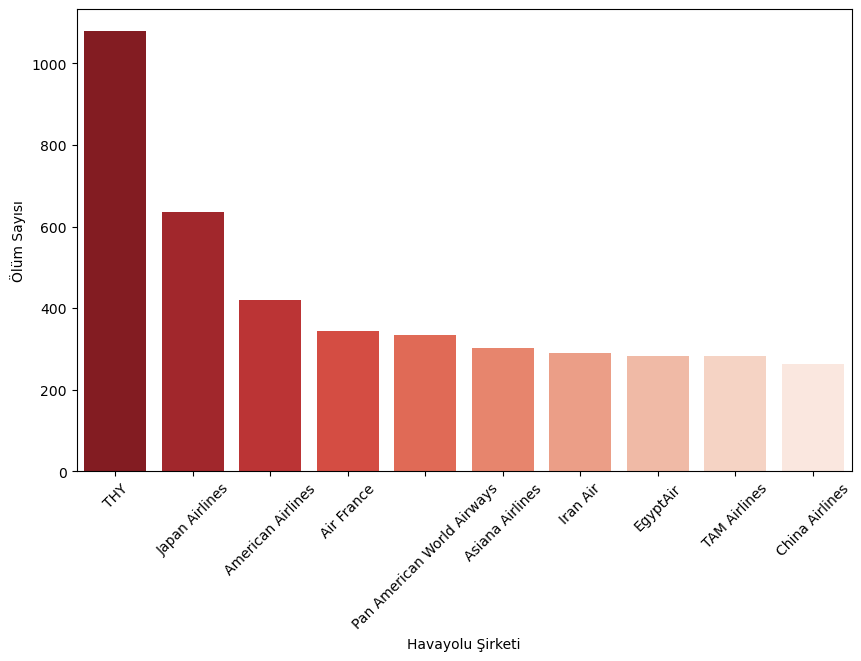

In [12]:
top_airlines = df.groupby("Havayolu Şirketi")["Ölü Sayısı"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airlines.index, y=top_airlines.values, hue=top_airlines.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel("Havayolu Şirketi")
plt.ylabel("Ölüm Sayısı")
plt.xticks(rotation=45)
plt.show

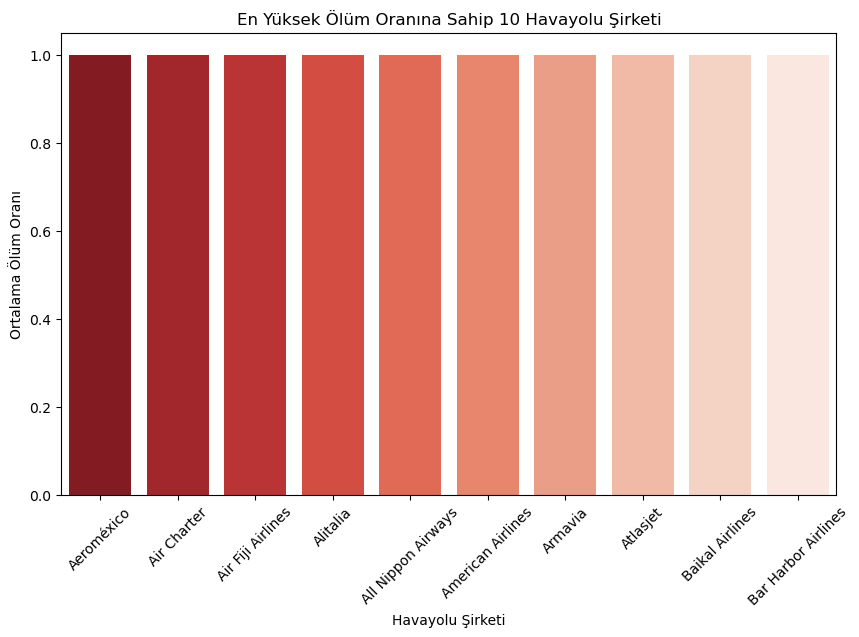

In [13]:
df['Ölüm Oranı'] = df['Ölü Sayısı'] / (df['Ölü Sayısı'] + df['Kurtulan Sayısı'])

airline_death_rate = df.groupby("Havayolu Şirketi")["Ölüm Oranı"].mean()

top_airlines_by_death_rate = airline_death_rate.nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airlines_by_death_rate.index, y=top_airlines_by_death_rate.values, hue=top_airlines_by_death_rate.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel("Havayolu Şirketi")
plt.ylabel("Ortalama Ölüm Oranı")
plt.xticks(rotation=45)
plt.title("En Yüksek Ölüm Oranına Sahip 10 Havayolu Şirketi")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

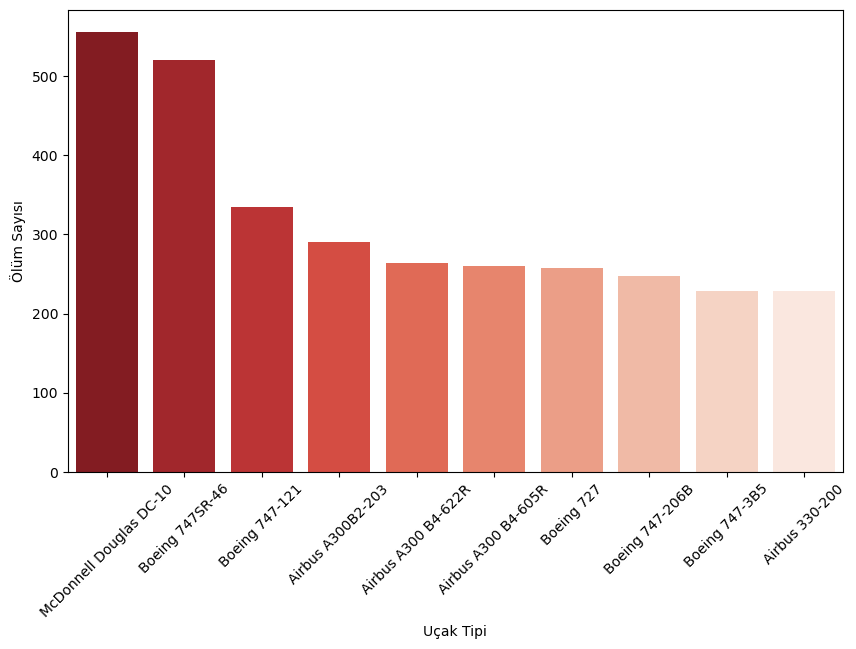

In [14]:
top_planes = df.groupby("Uçak Tipi")["Ölü Sayısı"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_planes.index, y=top_planes.values, hue=top_planes.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel("Uçak Tipi")
plt.ylabel("Ölüm Sayısı")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

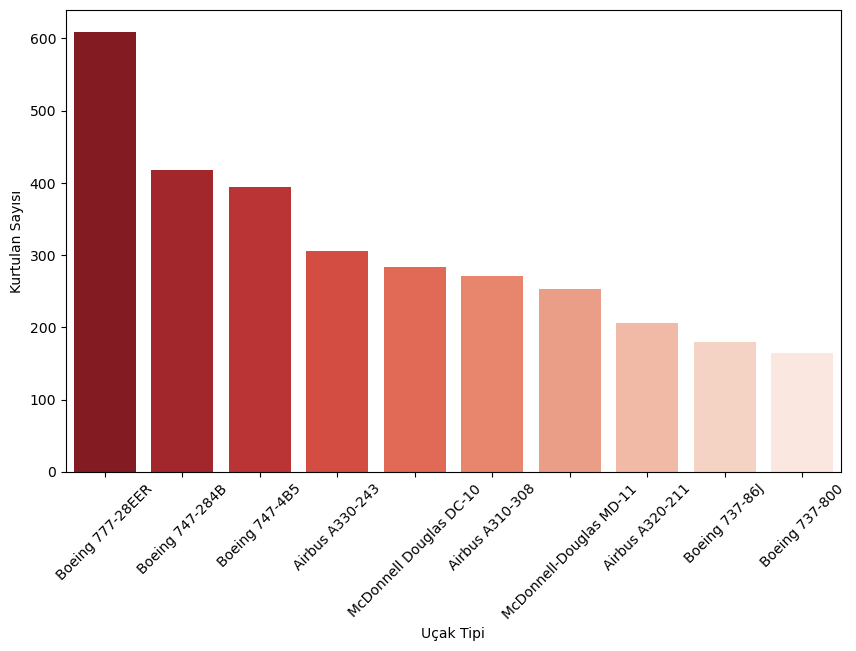

In [15]:
top_planes = df.groupby("Uçak Tipi")["Kurtulan Sayısı"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_planes.index, y=top_planes.values, hue=top_planes.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel("Uçak Tipi")
plt.ylabel("Kurtulan Sayısı")
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

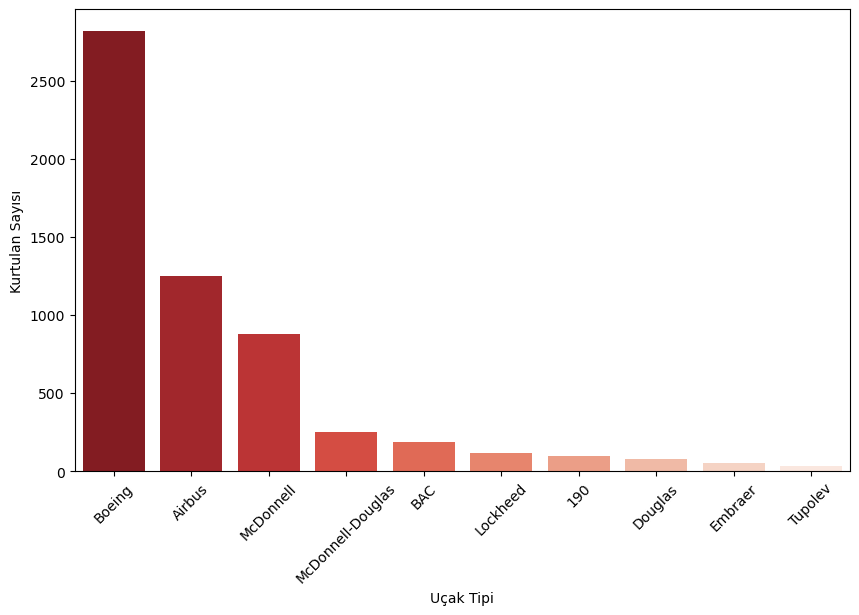

In [16]:
df['Uçak Tipi'] = df['Uçak Tipi'].str.split().str[0]

top_planes = df.groupby("Uçak Tipi")["Kurtulan Sayısı"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_planes.index, y=top_planes.values, hue=top_planes.index, dodge=False, palette="Reds_r", legend=False)
plt.xlabel("Uçak Tipi")
plt.ylabel("Kurtulan Sayısı")
plt.xticks(rotation=45)
plt.show

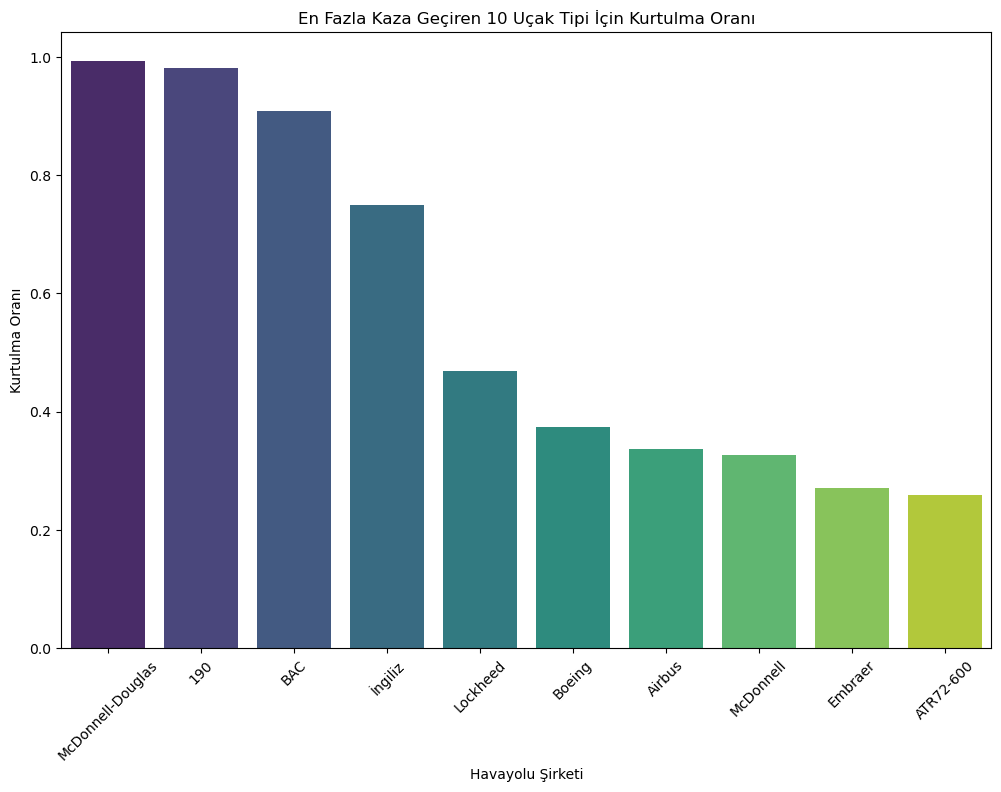

In [17]:
df['Kurtulma Oranı'] = df['Kurtulan Sayısı'] / (df['Kurtulan Sayısı'] + df['Ölü Sayısı'])

airline_survival_rate = df.groupby('Uçak Tipi')['Kurtulma Oranı'].mean()

top_airlines = airline_survival_rate.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="viridis", hue=top_airlines.index, dodge=False, legend=False)
plt.xticks(rotation=45)
plt.xlabel("Havayolu Şirketi")
plt.ylabel("Kurtulma Oranı")
plt.title("En Fazla Kaza Geçiren 10 Uçak Tipi İçin Kurtulma Oranı")
plt.show()


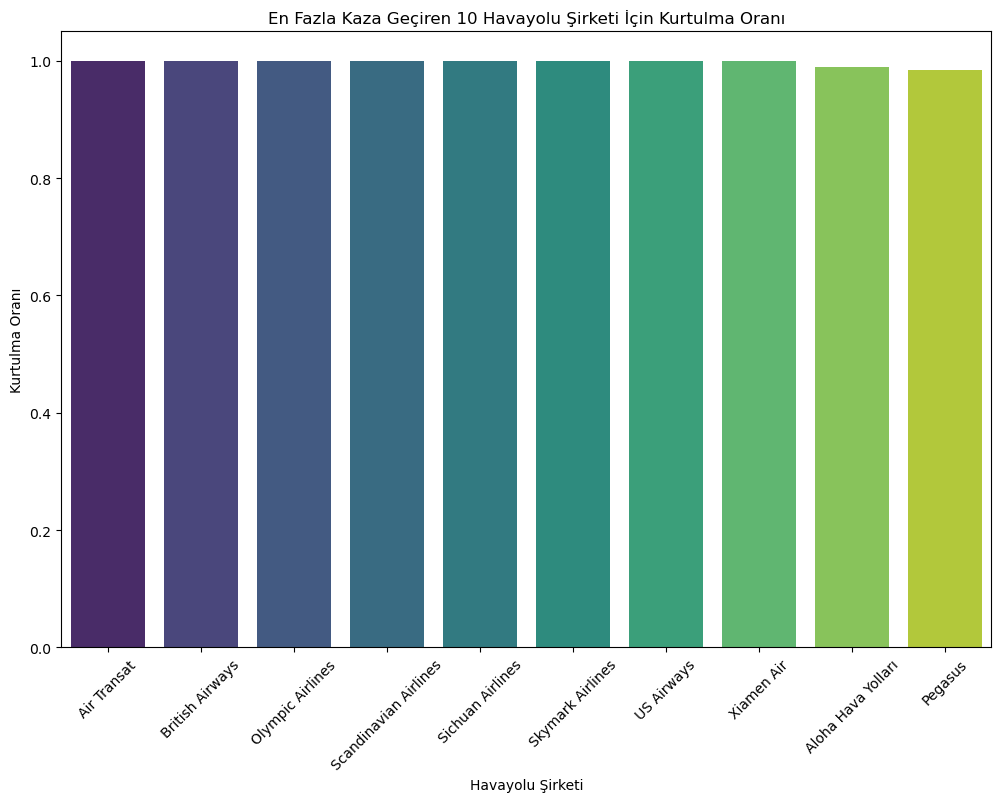

In [18]:
df['Kurtulma Oranı'] = df['Kurtulan Sayısı'] / (df['Kurtulan Sayısı'] + df['Ölü Sayısı'])
airline_survival_rate = df.groupby('Havayolu Şirketi')['Kurtulma Oranı'].mean()
top_airlines = airline_survival_rate.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="viridis", hue=top_airlines.index, dodge=False, legend=False)
plt.xticks(rotation=45)
plt.xlabel("Havayolu Şirketi")
plt.ylabel("Kurtulma Oranı")
plt.title("En Fazla Kaza Geçiren 10 Havayolu Şirketi İçin Kurtulma Oranı")
plt.show()


# KMEANS

In [20]:
df = pd.read_csv("kazalar.csv")
df = df.fillna(df.mode().iloc[0])

encoders = {}
for col in ["Havayolu Şirketi", "Uçak Tipi", "Hava Durumu"]:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col].astype(str))


In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Yıl', 'Ölü Sayısı', 'Uçak Tipi']])

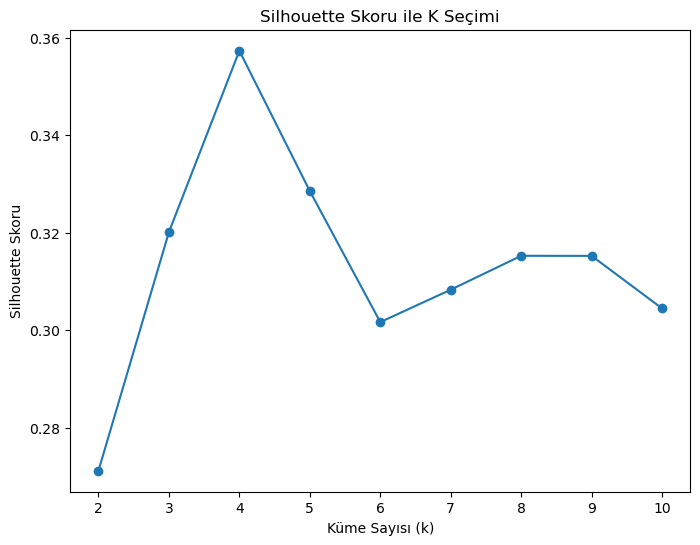

In [22]:
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    sil_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Skoru ile K Seçimi')
plt.show()

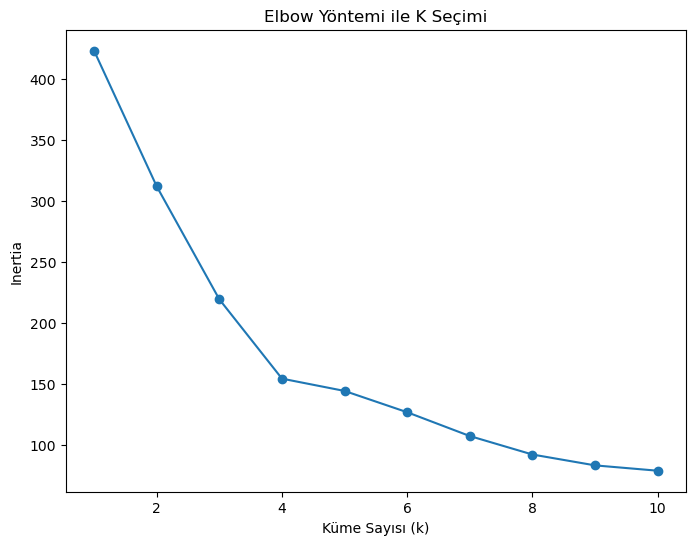

In [23]:
X = df[['Ölü Sayısı', 'Kurtulan Sayısı']]

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile K Seçimi')
plt.show()

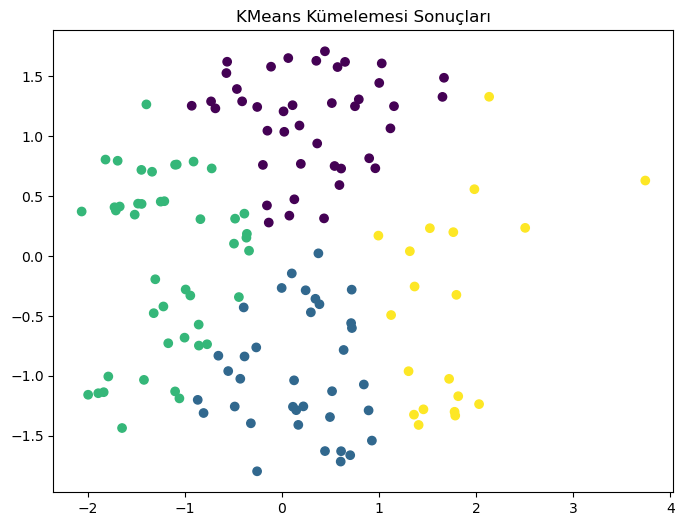

In [24]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_result)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Kümelemesi Sonuçları")
plt.show()

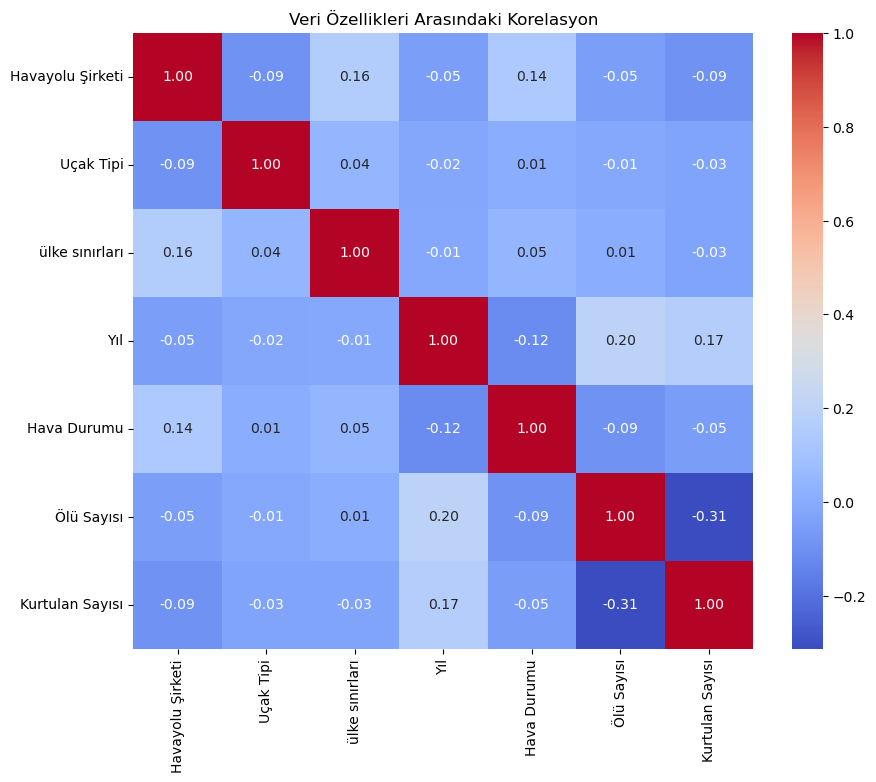

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Veri Özellikleri Arasındaki Korelasyon")
plt.show()

In [26]:
X = df[['Yıl', 'Uçak Tipi']]
y = df['Ölü Sayısı']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 59.051181409725075
Mean Squared Error (MSE): 9638.59526845902
Root Mean Squared Error (RMSE): 98.1763478056656
R-squared (R²): -0.007027352878173909


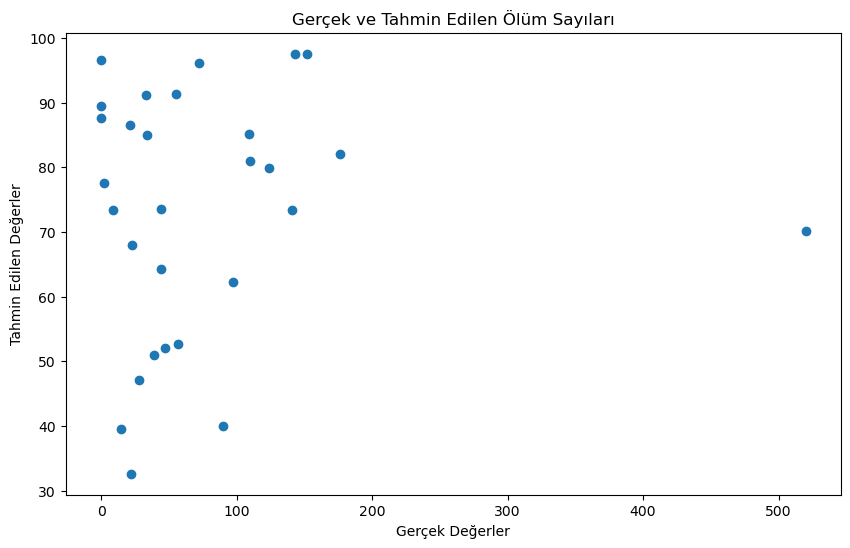

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Ölüm Sayıları')
plt.show()

# Random Forest Regression ile Ölüm Sayısı Tahmini

In [30]:
df = pd.read_csv("kazalar.csv")
df = df.fillna(df.mode().iloc[0])

df = pd.get_dummies(df, columns=["Havayolu Şirketi", "Uçak Tipi", "Hava Durumu"])

df = df.dropna(subset=["Ölü Sayısı"])

X = df.drop(columns=["Ölü Sayısı"])
y = df["Ölü Sayısı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 44.55137931034482


In [31]:
new_crash = {
    "Havayolu Şirketi": "TAROM",
    "Uçak Tipi": "Airbus",
    "Hata Türü": 0.0, 
    "Hava Durumu": 1.0,
    "Pilot Uçuş Saati": 7000.0,
    "Yıl": 2025,
}

columns = ["Havayolu Şirketi", "Uçak Tipi", "Hata Türü", "Hava Durumu", "Pilot Uçuş Saati", "Yıl"]

new_crash_df = pd.DataFrame(new_crash, index=[0])[columns]

missing_cols = list(set(X_train.columns) - set(new_crash_df.columns))
missing_df = pd.DataFrame(0, index=new_crash_df.index, columns=missing_cols)

new_crash_df = pd.concat([new_crash_df, missing_df], axis=1)

for col in ["Havayolu Şirketi", "Uçak Tipi", "Hata Türü", "Hava Durumu"]:
    if col in encoders:
        if new_crash[col] in encoders[col].classes_:
            new_crash_df[col] = encoders[col].transform([new_crash[col]])[0]
        else:
            new_crash_df[col] = -1
    else:
        new_crash_df[col] = -1

new_crash_df = new_crash_df[X_train.columns]

predicted_deaths = model.predict(new_crash_df)


print(f"Tahmini Ölü Sayısı: {predicted_deaths[0]:.0f}")


Tahmini Ölü Sayısı: 112


# Logistic Regression

In [33]:
df = pd.read_csv("kazalar.csv")
df = df.fillna(df.mode().iloc[0])

df['Kaza Durumu'] = df['Ölü Sayısı'].apply(lambda x: 1 if x > 0 else 0)

df['Kurtulma Oranı'] = df['Kurtulan Sayısı'] / (df['Kurtulan Sayısı'] + df['Ölü Sayısı'])

label_encoder = LabelEncoder()

categorical_columns = ['Havayolu Şirketi', 'Uçak Tipi', 'Hava Durumu']

for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].fillna("Unknown"))

features = ['Havayolu Şirketi', 'Uçak Tipi', 'Yıl', 'Hava Durumu']
target_kaza = 'Kaza Durumu'
target_kurtulma = 'Kurtulma Oranı'

X = df[features]
y_kaza = df[target_kaza]
y_kurtulma = df[target_kurtulma]

X_train, X_test, y_kaza_train, y_kaza_test = train_test_split(X, y_kaza, test_size=0.2, random_state=42)
X_train_kurtulma, X_test_kurtulma, y_kurtulma_train, y_kurtulma_test = train_test_split(X, y_kurtulma, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_kaza_train)

y_kaza_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_kaza_test, y_kaza_pred)
print(f"Kaza Durumu Tahmini Modelinin Başarı Oranı: {accuracy:.2f}")

train_data = X_train_kurtulma.copy()
train_data[target_kurtulma] = y_kurtulma_train

train_data = train_data.dropna()

X_train_kurtulma_clean = train_data[features]
y_kurtulma_train_clean = train_data[target_kurtulma]

test_data = X_test_kurtulma.copy()
test_data[target_kurtulma] = y_kurtulma_test

test_data = test_data.dropna()

X_test_kurtulma_clean = test_data[features]
y_kurtulma_test_clean = test_data[target_kurtulma]

linreg = LinearRegression()
linreg.fit(X_train_kurtulma_clean, y_kurtulma_train_clean)

y_kurtulma_pred = linreg.predict(X_test_kurtulma_clean)

mae = mean_absolute_error(y_kurtulma_test_clean, y_kurtulma_pred)
print(f"Kurtulma Oranı Tahmini Modelinin Hata Miktarı (MAE): {mae:.2f}")


Kaza Durumu Tahmini Modelinin Başarı Oranı: 0.90
Kurtulma Oranı Tahmini Modelinin Hata Miktarı (MAE): 0.34


In [34]:
new_crash = {
    "Havayolu Şirketi": "Germanwings",
    "Uçak Tipi": "Airbus",
    "Hava Durumu": 1.0,
    "Pilot Uçuş Saati": 7000.0,
    "Yıl": 2025,
}

new_crash_df = pd.DataFrame([new_crash])

for col in categorical_columns:
    if new_crash[col] in label_encoder.classes_:
        new_crash_df[col] = label_encoder.transform([new_crash[col]])[0]
    else:
        new_crash_df[col] = -1

for col in X_train.columns:
    if col not in new_crash_df.columns:
        new_crash_df[col] = 0

predicted_kaza = logreg.predict(new_crash_df[features])
predicted_kurtulma = linreg.predict(new_crash_df[features])

if predicted_kaza[0] == 1:
    print(f"Kaza Olmuş! Tahmini Kurtulma Oranı: {predicted_kurtulma[0]:.2f}")
else:
    print("Kaza Olmamış!")


Kaza Olmuş! Tahmini Kurtulma Oranı: 0.28
